In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [14]:
#  Stats package rolling avg for past 4 games. Drop first four games
# https://www.google.com/search?client=firefox-b-1-d&q=python+rolling+average 

In [15]:
# Deep learning - xgboost feature selection 

In [22]:
df1 = pd.read_csv('./data/RollingAvgOnly2015_2020.csv',index_col='Unnamed: 0')

In [23]:
df1 = df1.dropna(subset=['TeamTotalYardsRoll','Opp'])
df1 = df1.drop(['HomeOrAway','Opp','Team_Name'], axis = 1)
df1 = df1.fillna(0)

In [24]:
df1.isnull().sum().sort_values(ascending = False)

teamPenaltiesYrdRoll    0
teamRB1_Rush_YdsRoll    0
W_L                     0
Team_Year               0
TeamTotalYardsRoll      0
teamQBcompRoll          0
teamQBAttRoll           0
teamQBPass_YdsRoll      0
teamQBPass_TDRoll       0
teamQBPass_INTRoll      0
teamQBPass_LongRoll     0
teamQBPass_RateRoll     0
teamRB1_LngRoll         0
teamPenaltiesRoll       0
teamWR1_TgtRoll         0
teamWR1_RecRoll         0
teamWR1_YrdsRoll        0
teamWR1_TDsRoll         0
teamWR2_TgtRoll         0
teamWR2_YrdsRoll        0
teamWR2_TDsRoll         0
team1stDownRoll         0
team3rdDownRoll         0
teamTimePossRoll        0
Week                    0
dtype: int64

In [132]:
# drop = ['Day','Date','Time_ET','Date_y','W_L','Team_Name','Home_QB_Team','Away_QB_Team','H_RB1_Team','H_RB1_Pos',
#          'H_RB2_Player','H_RB2_Pos','A_RB1_Team','A_RB1_Pos','A_RB2_Player','A_RB2_Pos',
#           'H_WR1_Team','H_WR1_Pos','H_WR2_Team','H_WR2_Pos','H_WR3_Team','H_WR3_Pos','A_WR1_Team',
#           'A_WR1_Pos','A_WR2_Team','A_WR2_Pos','A_WR3_Team','A_WR3_Pos']
# df1.drop(columns=drop,inplace=True)

In [25]:
df1

,Week,W_L,Team_Year,TeamTotalYardsRoll,teamQBcompRoll,teamQBAttRoll,teamQBPass_YdsRoll,teamQBPass_TDRoll,teamQBPass_INTRoll,teamQBPass_LongRoll,teamQBPass_RateRoll,teamRB1_Rush_YdsRoll,teamRB1_LngRoll,teamWR1_TgtRoll,teamWR1_RecRoll,teamWR1_YrdsRoll,teamWR1_TDsRoll,teamWR2_TgtRoll,teamWR2_YrdsRoll,teamWR2_TDsRoll,team1stDownRoll,team3rdDownRoll,teamTimePossRoll,teamPenaltiesRoll,teamPenaltiesYrdRoll
4,7,1,2015,376.600000,26.800000,41.000000,297.000000,2.200000,0.400000,42.800000,100.560000,44.000000,11.200000,11.400000,6.600000,80.800000,0.0,6.600000,61.400000,0.0,21.600000,44.441558,0.000000,7.600000,74.200000
5,8,1,2015,386.666667,27.333333,42.500000,299.500000,2.333333,0.333333,40.166667,100.150000,49.666667,13.166667,11.000000,6.500000,79.666667,0.0,7.333333,62.666667,0.0,22.000000,44.326299,0.000000,8.166667,79.000000
6,9,1,2015,397.142857,28.285714,44.142857,307.428571,2.285714,0.285714,38.285714,99.314286,43.142857,11.714286,11.714286,7.142857,83.714286,0.0,7.571429,66.000000,0.0,21.714286,45.136827,45.578444,7.571429,73.142857
8,11,1,2015,395.333333,28.000000,43.555556,305.666667,2.000000,0.555556,38.333333,95.088889,49.555556,12.333333,10.555556,6.666667,75.666667,0.0,8.222222,69.555556,0.0,21.888889,43.376623,44.576308,7.333333,66.111111
10,13,0,2015,401.636364,27.090909,43.000000,305.636364,1.909091,0.636364,42.000000,92.809091,51.636364,12.818182,10.363636,6.636364,82.818182,0.0,8.454545,70.090909,0.0,21.545455,42.632822,44.266204,7.090909,68.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,7,0,2019,364.833333,20.666667,29.333333,260.000000,1.666667,0.000000,38.833333,117.400000,69.166667,15.833333,6.000000,4.333333,67.500000,0.0,4.000000,47.833333,0.0,21.166667,33.275613,0.000000,6.666667,51.666667
2290,9,1,2019,398.875000,20.875000,31.250000,262.000000,1.625000,0.125000,38.875000,110.900000,75.500000,16.125000,5.875000,4.375000,66.750000,0.0,4.750000,51.875000,0.0,22.000000,38.078882,34.562802,6.500000,49.125000
2293,13,1,2019,389.181818,21.272727,32.727273,260.090909,1.636364,0.181818,35.363636,108.090909,72.818182,16.818182,6.454545,5.363636,66.363636,0.0,6.181818,67.000000,0.0,22.181818,38.256503,35.838033,6.909091,52.272727
2296,16,0,2019,383.857143,20.785714,32.428571,259.285714,1.642857,0.428571,37.000000,103.342857,74.142857,19.642857,6.142857,5.785714,59.357143,0.0,5.785714,66.500000,0.0,21.500000,40.027284,36.703681,6.714286,51.071429


In [150]:
# x = [x for x in df1.columns]
# x

In [31]:
# df1['HomeWin'] = df1['HomeWin'] * 1
df1['Week'].replace({"Wild Card": 18, "Division": 19, "Conf. Champ.":20 , "SuperBowl": 21}, inplace = True)


In [32]:
X=df1.loc[:, df1.columns != 'W_L'] #Features
y=df1['W_L'] # Labels

In [33]:
X

,Week,Team_Year,TeamTotalYardsRoll,teamQBcompRoll,teamQBAttRoll,teamQBPass_YdsRoll,teamQBPass_TDRoll,teamQBPass_INTRoll,teamQBPass_LongRoll,teamQBPass_RateRoll,teamRB1_Rush_YdsRoll,teamRB1_LngRoll,teamWR1_TgtRoll,teamWR1_RecRoll,teamWR1_YrdsRoll,teamWR1_TDsRoll,teamWR2_TgtRoll,teamWR2_YrdsRoll,teamWR2_TDsRoll,team1stDownRoll,team3rdDownRoll,teamTimePossRoll,teamPenaltiesRoll,teamPenaltiesYrdRoll
4,7,2015,376.600000,26.800000,41.000000,297.000000,2.200000,0.400000,42.800000,100.560000,44.000000,11.200000,11.400000,6.600000,80.800000,0.0,6.600000,61.400000,0.0,21.600000,44.441558,0.000000,7.600000,74.200000
5,8,2015,386.666667,27.333333,42.500000,299.500000,2.333333,0.333333,40.166667,100.150000,49.666667,13.166667,11.000000,6.500000,79.666667,0.0,7.333333,62.666667,0.0,22.000000,44.326299,0.000000,8.166667,79.000000
6,9,2015,397.142857,28.285714,44.142857,307.428571,2.285714,0.285714,38.285714,99.314286,43.142857,11.714286,11.714286,7.142857,83.714286,0.0,7.571429,66.000000,0.0,21.714286,45.136827,45.578444,7.571429,73.142857
8,11,2015,395.333333,28.000000,43.555556,305.666667,2.000000,0.555556,38.333333,95.088889,49.555556,12.333333,10.555556,6.666667,75.666667,0.0,8.222222,69.555556,0.0,21.888889,43.376623,44.576308,7.333333,66.111111
10,13,2015,401.636364,27.090909,43.000000,305.636364,1.909091,0.636364,42.000000,92.809091,51.636364,12.818182,10.363636,6.636364,82.818182,0.0,8.454545,70.090909,0.0,21.545455,42.632822,44.266204,7.090909,68.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,7,2019,364.833333,20.666667,29.333333,260.000000,1.666667,0.000000,38.833333,117.400000,69.166667,15.833333,6.000000,4.333333,67.500000,0.0,4.000000,47.833333,0.0,21.166667,33.275613,0.000000,6.666667,51.666667
2290,9,2019,398.875000,20.875000,31.250000,262.000000,1.625000,0.125000,38.875000,110.900000,75.500000,16.125000,5.875000,4.375000,66.750000,0.0,4.750000,51.875000,0.0,22.000000,38.078882,34.562802,6.500000,49.125000
2293,13,2019,389.181818,21.272727,32.727273,260.090909,1.636364,0.181818,35.363636,108.090909,72.818182,16.818182,6.454545,5.363636,66.363636,0.0,6.181818,67.000000,0.0,22.181818,38.256503,35.838033,6.909091,52.272727
2296,16,2019,383.857143,20.785714,32.428571,259.285714,1.642857,0.428571,37.000000,103.342857,74.142857,19.642857,6.142857,5.785714,59.357143,0.0,5.785714,66.500000,0.0,21.500000,40.027284,36.703681,6.714286,51.071429


In [34]:
#Split dataset into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [35]:
#create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clif.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [36]:
#Import scikit-learn metrics module for accuracy calcuation
from sklearn import metrics
#Model accuracy, how often is the classifier correct
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5253623188405797


With only rolling mean data we are at a 52% accuracy! Lets try to add in some team names and other features 

In [46]:
df1 = pd.read_csv('./data/HomeRollingAvg2015_2020.csv',index_col='Unnamed: 0')
df1.head(n=2)
# df1 = df1.drop(['HomeOrAway','Opp','Team_Name'], axis = 1)

,Week,W_L,OT,Home_Record,HomeOrAway,Opp,Expected Points_Home,Expected Points_Away,Expected Points_Sp. Tms,Team_Name,Team_Year,Home_QB_Player,Away_QB_Player,H_RB1_Player,H_RB2_Player,A_RB1_Player,A_RB2_Player,H_WR1_Player,H_WR2_Player,H_WR3_Player,A_WR1_Player,A_WR2_Player,A_WR3_Player,Roof,Surface,Duration,Attendance,Vegas Line,Over/Under,TeamTotalYardsRoll,teamQBcompRoll,teamQBAttRoll,teamQBPass_YdsRoll,teamQBPass_TDRoll,teamQBPass_INTRoll,teamQBPass_LongRoll,teamQBPass_RateRoll,teamRB1_Rush_YdsRoll,teamRB1_LngRoll,teamWR1_TgtRoll,teamWR1_RecRoll,teamWR1_YrdsRoll,teamWR1_TDsRoll,teamWR2_TgtRoll,teamWR2_YrdsRoll,teamWR2_TDsRoll,team1stDownRoll,team3rdDownRoll,teamTimePossRoll,teamPenaltiesRoll,teamPenaltiesYrdRoll
0,1,1,NaN,1-0,Home,Pittsburgh Steelers,20.02,-17.01,1.30,New England Patriots,2015,Tom Brady,Alex Smith,Steven Jackson,James White,Charcandrick West,Knile Davis,Julian Edelman,Rob Gronkowski,Keshawn Martin,Jason Avant,Albert Wilson,Chris Conley,outdoors,fieldturf,3:15,"66,829",New England Patriots -4.5,43.0(over),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1,NaN,3-0,Home,Jacksonville Jaguars,36.41,-0.60,-2.35,New England Patriots,2015,Tom Brady,Ben Roethlisberger,Dion Lewis,Brandon Bolden,DeAngelo Williams,Will Johnson,Julian Edelman,Rob Gronkowski,Danny Amendola,Antonio Brown,Heath Miller,Darrius Heyward-Bey,outdoors,fieldturf,3:00,"66,829",New England Patriots -7.0,52.0(under),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# dropCol = ['Surface','Duration','OT','Home_Record']
df1 = df1.drop(['Surface','Duration','OT','Home_Record'], axis=1)
df1 = df1.fillna(0)
df1['Week'].replace({"Wild Card": 18, "Division": 19, "Conf. Champ.":20 , "SuperBowl": 21}, inplace = True)

In [59]:
# pd.get_dummies(df, prefix=['Team_Name', 'Home_'])
df1= pd.get_dummies(df1)
df1 = df1.dropna(subset=['TeamTotalYardsRoll','teamTimePossRoll'])
df1

W_L  Expected Points_Home  Expected Points_Away  \
6       1                 12.06                  7.34   
8       1                  1.75                  1.49   
10      0                  0.42                  2.29   
12      1                  4.76                 15.56   
15      1                 12.79                 -6.75   
...   ...                   ...                   ...   
2277    1                 -8.20                 -0.70   
2290    1                 24.58                -13.19   
2293    1                  5.79                 -6.46   
2296    0                -13.87                -10.12   
2297    0                 10.85                -18.28   

      Expected Points_Sp. Tms  Team_Year  TeamTotalYardsRoll  teamQBcompRoll  \
6                       -3.71       2015          397.142857       28.285714   
8                        3.36       2015          395.333333       28.000000   
10                     -11.55       2015          401.636364       27.090909   
12                      -4.63       2015          381.000000       26.923077   
15                       1.22       2015          384.937500       26.062500   
...                       ...        ...                 ...             ...   
2277                    10.20       2019          333.642857       19.857143   
2290                    -6.92       2019          398.875000       20.875000   
2293                    10.50       2019          389.181818       21.272727   
2296                     6.82       2019          383.857143       20.785714   
2297                     3.02       2019          381.466667       21.066667   

      teamQBAttRoll  teamQBPass_YdsRoll  teamQBPass_TDRoll  \
6         44.142857          307.428571           2.285714   
8         43.555556          305.666667           2.000000   
10        43.000000          305.636364           1.909091   
12        43.923077          304.153846           2.076923   
15        41.687500          298.250000           2.062500   
...             ...                 ...                ...   
2277      32.428571          217.214286           0.928571   
2290      31.250000          262.000000           1.625000   
2293      32.727273          260.090909           1.636364   
2296      32.428571          259.285714           1.642857   
2297      33.000000          260.466667           1.600000   

      teamQBPass_INTRoll  teamQBPass_LongRoll  teamQBPass_RateRoll  \
6               0.285714            38.285714            99.314286   
8               0.555556            38.333333            95.088889   
10              0.636364            42.000000            92.809091   
12              0.692308            42.692308            91.661538   
15              0.687500            43.937500            94.556250   
...                  ...                  ...                  ...   
2277            0.571429            40.214286            84.564286   
2290            0.125000            38.875000           110.900000   
2293            0.181818            35.363636           108.090909   
2296            0.428571            37.000000           103.342857   
2297            0.600000            36.000000           100.366667   

      teamRB1_Rush_YdsRoll  teamRB1_LngRoll  teamWR1_TgtRoll  teamWR1_RecRoll  \
6                43.142857        11.714286        11.714286         7.142857   
8                49.555556        12.333333        10.555556         6.666667   
10               51.636364        12.818182        10.363636         6.636364   
12               49.923077        12.307692        10.538462         6.615385   
15               50.437500        13.375000        10.062500         6.187500   
...                    ...              ...              ...              ...   
2277             62.142857        17.857143         7.214286         5.071429   
2290             75.500000        16.125000         5.875000         4.375000   
2293             72.818182        16.818182  

In [60]:
X=df1.loc[:, df1.columns != 'W_L'] #Features
y=df1['W_L'] # Labels
#Split dataset into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)
#create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clif.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [61]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7121951219512195


In [85]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [124]:
# importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]
# for f in range(0,25):
#     print("%d. feature %d (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
# # X_train.columns[0]


for name, importance in zip(df1.loc[:, df1.columns != 'W_L'], rnd_clf.feature_importances_):
    print(name, "=", importance)

Expected Points_Home = 0.11249225099876375
Expected Points_Away = 0.02311928828251033
Expected Points_Sp. Tms = 0.4410304643639577
Team_Year = 0.4233579963547682


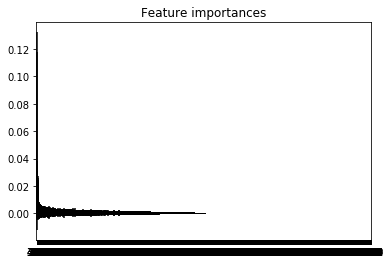

In [101]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()